# Report 3, Pascal Lorenz
## BIO206 2021<br>

For all questions, in addition to your answers (in markdown cells), provide each simulation code as well in a separate code cell, so that I can verify that they are working just by pressing Run. <br>

**Deadline for submission**: Wednesday, 18:00. 

___

* **Question 1. Segregation** <br>

Adapt ABM 1 - Segregation, so that instead of two, you simulate *three* types of agents in a town, with potentially different homophyly thresholds (=required fraction of same-type individuals in their neighbourhood). <br> <br>
Starting from an initially random distribution, populations show differences in homophyly depending on the scenario: <br> <br>
**Scenario 1)** The three types are moderately tolerant of other types (all thresholds = 0.5) <br>
**Scenario 2)** The three types are intolerant (all thresholds = 0.65) <br>
**Scenario 3)** The three types are tolerant (all thresholds = 0.15)  <br>
**Scenario 4)** Only one of the three types is intolerant (threshold = 0.65) <br>
**Scenario 5)** Only one type is tolerant (threshold = 0.15) <br>

For each of the scenarios above:  
* Insert a figure with the result (first save the figure at the end of each of your simulations using the Save buttom in the simulation window. Place the saved figure in the same folder as your Jupyter notebook. Then insert figure in a *markdown* cell, using the simple code provided in the next cell). <br> 
* Discuss whether the outcome is: i) no segregation, ii) partial segregation, iii) total segregation of types. 
* Interpret the results, or why the result was i), ii) or iii).<br>

Notes: <br>
Run simulations for a *maximum* of 100,000 steps, although for some scenarios fewer than 5,000 are required to show a pattern.<br>
Run each scenario 2-3 times to make sure of the pattern, but only present one figure for each. <br>
Use n=1000 and r = 0.1 as in the original ABM 1.


In [ ]:
Hello, this is the code to add figure (in a markdown cell, not a code cell like this one):
<img src="Your_figure.png">

In [13]:
import pycxsimulator
from pylab import *

def setupfunct(n = 1000, r = 0.1, thresh = [0.5, 0.5, 0.5]): # order of threshs is: red, blue, green
    class agent:
        pass

    def initialise():
        %matplotlib
        global agents
        agents = []
        for i in range(n):
            ag = agent()
            ag.type = randint(3)
            ag.x = random()
            ag.y = random()
            agents.append(ag)
        
    def observe():
        global agents
        cla()
        red = [ag for ag in agents if ag.type == 0]
        blue = [ag for ag in agents if ag.type == 1]
        green = [ag for ag in agents if ag.type == 2]
        plot([ag.x for ag in red], [ag.y for ag in red], 'ro')
        plot([ag.x for ag in blue], [ag.y for ag in blue], 'bo')
        plot([ag.x for ag in green], [ag.y for ag in green], 'go')
        axis('image')
        axis([0, 1, 0, 1])

    def update():
        global agents
        ag = choice(agents)
        mythresh = thresh[ag.type]
        neighbours = [nb for nb in agents
                    if (ag.x - nb.x)**2 + (ag.y - nb.y)**2 < r**2 and nb != ag]
        if len(neighbours) > 0:
            q = len([nb for nb in neighbours if nb.type == ag.type]) \
                / float(len(neighbours))
            if q < mythresh:
                ag.x, ag.y = random(), random()
    funct = [initialise, observe, update]
    return(funct)
    


def showplot(tempax = None, tempfig = None, mytitle = None):
    %matplotlib inline

    if tempax is None:
        tempax = plt.gca()

    if tempfig is None:
        tempfig = plt.gcf()
    
    global agents
    cla()
    red = [ag for ag in agents if ag.type == 0]
    blue = [ag for ag in agents if ag.type == 1]
    green = [ag for ag in agents if ag.type == 2]
    plot([ag.x for ag in red], [ag.y for ag in red], 'ro')
    plot([ag.x for ag in blue], [ag.y for ag in blue], 'bo')
    plot([ag.x for ag in green], [ag.y for ag in green], 'go')
    axis('image')
    axis([0, 1, 0, 1])

    
    if mytitle != None:
        title(mytitle)

    tight_layout()

    return(tempax)

In [5]:
pycxsimulator.GUI().start(func=setupfunct())

Using matplotlib backend: TkAgg


<AxesSubplot:title={'center':'All 0.5, 27000 steps'}>

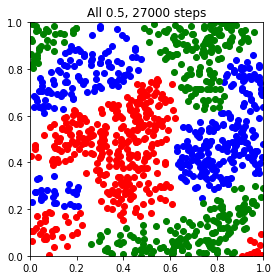

In [14]:
mytitle = "All 0.5, 27000 steps"
showplot(mytitle=mytitle)

There is clear segregation, for the exact same reasons as in the previous, two group model: even though 0.5 as a threshold doesn't seem very high, as soon as some area randomly happens to have a lot of one color, any other color that goes there will definitely move away, and any of the same color that move in will stay.

In [17]:
pycxsimulator.GUI().start(func=setupfunct(thresh = [0.65, 0.65, 0.65]))

Using matplotlib backend: TkAgg


<AxesSubplot:title={'center':'All 0.65, 100000 steps'}>

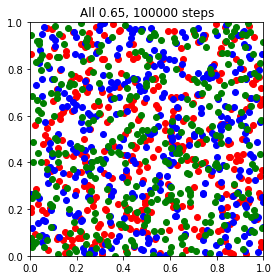

In [16]:
mytitle = "All 0.65, 100000 steps"
showplot(mytitle=mytitle)

We got no segregation here, even though the colors are very intolerant. I'm guessing since there are three colors here, the chance of an area establishing itself as a spot where the 0.65 threshold for a single color is met is very low, therefore any agent that checks if it should move will always move, and never find a spot where it will remain.

In [18]:
pycxsimulator.GUI().start(func=setupfunct(thresh = [0.15, 0.15, 0.15]))

Using matplotlib backend: TkAgg


<AxesSubplot:title={'center':'All 0.15, 100000 steps'}>

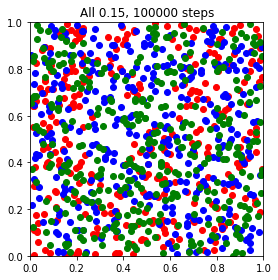

In [19]:
mytitle = "All 0.15, 100000 steps"
showplot(mytitle=mytitle)

We get no seperation once again, but this time it's because agents are already satisfied in a location with quite mixed surroundings, so there is no reason to move away from these non-segregated spots. In fact, I let this model run to 100000 steps each time, but around 50000 steps all the points would stop moving already, because they were content where they were.

In [20]:
pycxsimulator.GUI().start(func=setupfunct(thresh = [0.15, 0.15, 0.65])) # green is the intolerant one

Using matplotlib backend: TkAgg


<AxesSubplot:title={'center':'Green 0.65, others 0.15, 100000 steps'}>

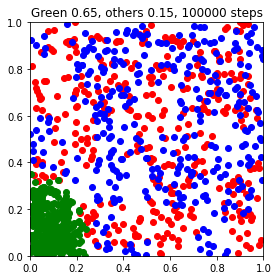

In [21]:
mytitle = "Green 0.65, others 0.15, 100000 steps"
showplot(mytitle=mytitle)

Here, we get complete separation of green from the others, but blue and red remain mixed. The reason green collects together is obvious: they move away unless they have more green around. And once the green areas have been established, red and blue will move away from there too, even though they are quite tolerant, simply due to the sheer mass of green surrounding them.

In [22]:
pycxsimulator.GUI().start(func=setupfunct(thresh = [0.65, 0.65, 0.15])) # green is the tolerant one

Using matplotlib backend: TkAgg


<AxesSubplot:title={'center':'Green 0.15, others 0.65, 100000 steps'}>

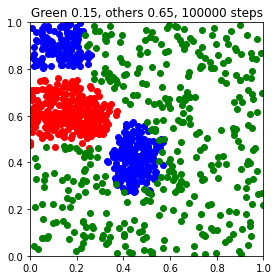

In [23]:
mytitle = "Green 0.15, others 0.65, 100000 steps"
showplot(mytitle=mytitle)

In this situation, we get complete separation. Interesting to note is that it took longer than with all 0.5 thresholds, because green was constantly getting in the way of red and blue neighborhood forming, since green didn't mind remaining despite them being more common there. Only once random chance lead to a spot where green was rare enough to fall below its threshold were blue and red neighborhoods able to develop. This is also why most of the plot is "owned" by green, because red and blue had to amass arounf the small spots where they could establish themselves against green.

* **Question 2. Cultural evolution** <br>

Adapt ABM 5 - Cultural evolution.  

**1)** Modify the original code so that instead of transferring a new tool only to close kin, both partners transmit new tools to **all** their neighbours. 



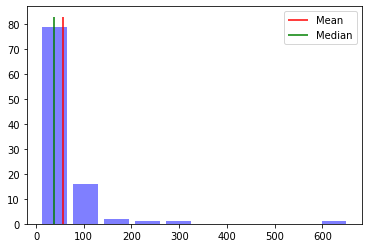

Simulations =  100
Mean time to discovery of C1/C2 =  56.67 rounds
Median time to discovery of C1/C2 =  38.5 rounds


In [26]:
import networkx as nx
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

net = 'agtanet.txt'
G = nx.read_weighted_edgelist(net, nodetype = int)

sims = 100
sim_duration = [] # to store each simulation duration 

# beginning of simulations
for i in range(sims):
    G_closekin = nx.Graph() # creates a new empty network
    for i, j in G.edges:
        if G[i][j]['kin'] == 1: # if (i, j) dyad in G is kin = 1
            G_closekin.add_edge(i, j) # add that edge to new network
            G_closekin[i][j]['weight'] = G[i][j]['weight'] # add weight from G to new network 

    for node in G: 
        if node not in G_closekin:
            G_closekin.add_node(node)

    matrix_node_tools=[[0]*6 + [-1]*8 for i in range (len(G))]
    fitness_values = [6, 8, 10, 6, 8, 10, 30, 30, 60, 60, 120, 120, 300, 300] # each column has a value
    innovations_dict = {(0, 1, 2): 6, 
                 (3, 4, 5): 7,
                 (0, 4, 6): 8,
                 (1, 2, 7): 9,
                 (4, 5, 8): 10,
                 (1, 3, 9): 11,
                 (8, 10, 11): 12,
                 (9, 10, 11): 13}

    periods=10000
    stop_sim=0   
    for epoch in range(periods):
        random_node_list = rd.sample(range(len(G)), len(G))
        for node in random_node_list:
            neighbour_list = []
            for neighbour in G[node]:
                for times in range(int(G[node][neighbour]['weight'])):
                    neighbour_list.append(neighbour)
            selected_neighbour = rd.choice(neighbour_list)

            ingredients_node=np.where(np.array(matrix_node_tools[node])>-1)[0] 
            ingredients_neighbour=np.where(np.array(matrix_node_tools[selected_neighbour])>-1)[0]

            node_tools=[]
            for tool in ingredients_node:
                for times in range(fitness_values[tool]):
                    node_tools.append(tool)
            node_tool_1, node_tool_2 = rd.sample(node_tools, 2)

            neighbour_tools=[]
            for tool in ingredients_neighbour:
                for times in range(fitness_values[tool]):
                    neighbour_tools.append(tool)
            neighbour_tool = rd.choice(neighbour_tools)

            triad = [node_tool_1, node_tool_2, neighbour_tool]
            triad = tuple(sorted(triad))
            new_tool = innovations_dict.get(triad,-1)

            # until here, similar to previous cell  

            if new_tool > -1: # if a new drug was created (6, 7 or 8 etc) 
                # check if node and neighbour already have invented tool 
                have_new_tool = -1 # we need this later
                if matrix_node_tools[node][new_tool] == -1: # if position (i = node, j = new tool) in matrix is absent
                    have_new_tool = 1 
                    matrix_node_tools[node][new_tool] = epoch + 1 # node gains new tools, replace -1 with round of discovery
                    for allneibs in G[node]: # now use matrix G_closekin to identify all close kin of node 
                        matrix_node_tools[allneibs][new_tool] = epoch + 1 # tranmits new tool to all kin

                if matrix_node_tools[selected_neighbour][new_tool] == -1: #check if selected neighbour has tool
                    have_new_tool = 1 
                    matrix_node_tools[selected_neighbour][new_tool]= epoch + 1 # neighbours gains new tool
                    for allneibneibs in G[selected_neighbour]:
                        matrix_node_tools[allneibneibs][new_tool] = epoch+ 1

                if have_new_tool == 1: #if either node or neighbour received the new tool
                    #print(new_tool, epoch + 1, node, selected_neighbour)
                    if new_tool in [12,13]: # BUT if the new tool is a superdrug C1=12 or C2=13
                        stop_sim=1 # simulations ends
                        sim_duration.append(epoch + 1)                        
            if stop_sim==1:
                break
        if stop_sim==1:
            break

mean1 = np.mean(sim_duration)
median1 = np.median(sim_duration)
simduration1 = sim_duration
plt.hist(sim_duration, facecolor='b', alpha=.5, rwidth=.8)
ymin, ymax = plt.gca().get_ylim()
plt.vlines(mean1, colors = 'r', ymin = ymin, ymax = ymax, label = 'Mean')
plt.vlines(median1, colors = 'g', ymin = ymin, ymax = ymax, label = 'Median')
plt.gca().legend()
plt.show()
print("Simulations = ", sims)
print("Mean time to discovery of C1/C2 = ", mean1, "rounds")
print("Median time to discovery of C1/C2 = ", median1, "rounds")

**2)** Modify original code so that instead of the Agta network, you play the game with a *complete* or fully connected network of the same size. Both partners transmit findings to all their neighbours. <br>
(Notes: to create a complete graph of size n, use *nx.complete_graph(n)* with NetworkX. <br>
You have to remove selection of playing partner based on weights of links, since the complete graph has no weigths. Select neighbour randomly.)



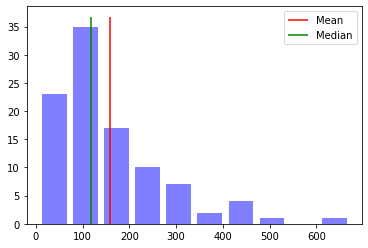

Simulations =  100
Mean time to discovery of C1/C2 =  158.51 rounds
Median time to discovery of C1/C2 =  117.5 rounds


In [28]:
import networkx as nx
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

G = nx.complete_graph(53)

sims = 100
sim_duration = [] # to store each simulation duration 

# beginning of simulations
for i in range(sims):

    matrix_node_tools=[[0]*6 + [-1]*8 for i in range (len(G))]
    fitness_values = [6, 8, 10, 6, 8, 10, 30, 30, 60, 60, 120, 120, 300, 300] # each column has a value
    innovations_dict = {(0, 1, 2): 6, 
                 (3, 4, 5): 7,
                 (0, 4, 6): 8,
                 (1, 2, 7): 9,
                 (4, 5, 8): 10,
                 (1, 3, 9): 11,
                 (8, 10, 11): 12,
                 (9, 10, 11): 13}

    periods=10000
    stop_sim=0   
    for epoch in range(periods):
        random_node_list = rd.sample(range(len(G)), len(G))
        for node in random_node_list:
            neighbour_list = []
            for neighbour in G[node]:
                neighbour_list.append(neighbour)
            selected_neighbour = rd.choice(neighbour_list)

            ingredients_node=np.where(np.array(matrix_node_tools[node])>-1)[0] 
            ingredients_neighbour=np.where(np.array(matrix_node_tools[selected_neighbour])>-1)[0]

            node_tools=[]
            for tool in ingredients_node:
                for times in range(fitness_values[tool]):
                    node_tools.append(tool)
            node_tool_1, node_tool_2 = rd.sample(node_tools, 2)

            neighbour_tools=[]
            for tool in ingredients_neighbour:
                for times in range(fitness_values[tool]):
                    neighbour_tools.append(tool)
            neighbour_tool = rd.choice(neighbour_tools)

            triad = [node_tool_1, node_tool_2, neighbour_tool]
            triad = tuple(sorted(triad))
            new_tool = innovations_dict.get(triad,-1)

            # until here, similar to previous cell  

            if new_tool > -1: # if a new drug was created (6, 7 or 8 etc) 
                # check if node and neighbour already have invented tool 
                have_new_tool = -1 # we need this later
                if matrix_node_tools[node][new_tool] == -1: # if position (i = node, j = new tool) in matrix is absent
                    have_new_tool = 1 
                    matrix_node_tools[node][new_tool] = epoch + 1 # node gains new tools, replace -1 with round of discovery
                    for allneibs in G[node]: # now use matrix G_closekin to identify all close kin of node 
                        matrix_node_tools[allneibs][new_tool] = epoch + 1 # tranmits new tool to all kin

                if matrix_node_tools[selected_neighbour][new_tool] == -1: #check if selected neighbour has tool
                    have_new_tool = 1 
                    matrix_node_tools[selected_neighbour][new_tool]= epoch + 1 # neighbours gains new tool
                    for allneibneibs in G[selected_neighbour]:
                        matrix_node_tools[allneibneibs][new_tool] = epoch+ 1

                if have_new_tool == 1: #if either node or neighbour received the new tool
                    #print(new_tool, epoch + 1, node, selected_neighbour)
                    if new_tool in [12,13]: # BUT if the new tool is a superdrug C1=12 or C2=13
                        stop_sim=1 # simulations ends
                        sim_duration.append(epoch + 1)                        
            if stop_sim==1:
                break
        if stop_sim==1:
            break

mean2 = np.mean(sim_duration)
median2 = np.median(sim_duration)
simduration2 = sim_duration
plt.hist(sim_duration, facecolor='b', alpha=.5, rwidth=.8)
ymin, ymax = plt.gca().get_ylim()
plt.vlines(mean2, colors = 'r', ymin = ymin, ymax = ymax, label = 'Mean')
plt.vlines(median2, colors = 'g', ymin = ymin, ymax = ymax, label = 'Median')
plt.gca().legend()
plt.show()
print("Simulations = ", sims)
print("Mean time to discovery of C1/C2 = ", mean2, "rounds")
print("Median time to discovery of C1/C2 = ", median2, "rounds")

**3)** Modify original code so that instead of the Agta network, you play the game with a *random network* of the same size and density (see code from Intro to NetworkX notebook). As the probability *p* of an edge in the random network, use the density of the Agta network. Also transmit fidings to all neighbours. <br>



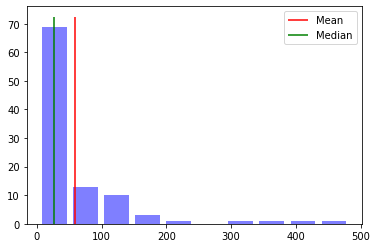

Simulations =  100
Mean time to discovery of C1/C2 =  58.77 rounds
Median time to discovery of C1/C2 =  26.0 rounds


In [33]:
import networkx as nx
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

agta = nx.read_weighted_edgelist(net, nodetype = int)
G = nx.erdos_renyi_graph(53, nx.density(agta))

sims = 100
sim_duration = [] # to store each simulation duration 

# beginning of simulations
for i in range(sims):

    matrix_node_tools=[[0]*6 + [-1]*8 for i in range (len(G))]
    fitness_values = [6, 8, 10, 6, 8, 10, 30, 30, 60, 60, 120, 120, 300, 300] # each column has a value
    innovations_dict = {(0, 1, 2): 6, 
                 (3, 4, 5): 7,
                 (0, 4, 6): 8,
                 (1, 2, 7): 9,
                 (4, 5, 8): 10,
                 (1, 3, 9): 11,
                 (8, 10, 11): 12,
                 (9, 10, 11): 13}

    periods=10000
    stop_sim=0   
    for epoch in range(periods):
        random_node_list = rd.sample(range(len(G)), len(G))
        for node in random_node_list:
            neighbour_list = []
            for neighbour in G[node]:
                neighbour_list.append(neighbour)
            selected_neighbour = rd.choice(neighbour_list)

            ingredients_node=np.where(np.array(matrix_node_tools[node])>-1)[0] 
            ingredients_neighbour=np.where(np.array(matrix_node_tools[selected_neighbour])>-1)[0]

            node_tools=[]
            for tool in ingredients_node:
                for times in range(fitness_values[tool]):
                    node_tools.append(tool)
            node_tool_1, node_tool_2 = rd.sample(node_tools, 2)

            neighbour_tools=[]
            for tool in ingredients_neighbour:
                for times in range(fitness_values[tool]):
                    neighbour_tools.append(tool)
            neighbour_tool = rd.choice(neighbour_tools)

            triad = [node_tool_1, node_tool_2, neighbour_tool]
            triad = tuple(sorted(triad))
            new_tool = innovations_dict.get(triad,-1)

            # until here, similar to previous cell  

            if new_tool > -1: # if a new drug was created (6, 7 or 8 etc) 
                # check if node and neighbour already have invented tool 
                have_new_tool = -1 # we need this later
                if matrix_node_tools[node][new_tool] == -1: # if position (i = node, j = new tool) in matrix is absent
                    have_new_tool = 1 
                    matrix_node_tools[node][new_tool] = epoch + 1 # node gains new tools, replace -1 with round of discovery
                    for allneibs in G[node]: # now use matrix G_closekin to identify all close kin of node 
                        matrix_node_tools[allneibs][new_tool] = epoch + 1 # tranmits new tool to all kin

                if matrix_node_tools[selected_neighbour][new_tool] == -1: #check if selected neighbour has tool
                    have_new_tool = 1 
                    matrix_node_tools[selected_neighbour][new_tool]= epoch + 1 # neighbours gains new tool
                    for allneibneibs in G[selected_neighbour]:
                        matrix_node_tools[allneibneibs][new_tool] = epoch+ 1

                if have_new_tool == 1: #if either node or neighbour received the new tool
                    #print(new_tool, epoch + 1, node, selected_neighbour)
                    if new_tool in [12,13]: # BUT if the new tool is a superdrug C1=12 or C2=13
                        stop_sim=1 # simulations ends
                        sim_duration.append(epoch + 1)                        
            if stop_sim==1:
                break
        if stop_sim==1:
            break

mean3 = np.mean(sim_duration)
median3 = np.median(sim_duration)
simduration3 = sim_duration
plt.hist(sim_duration, facecolor='b', alpha=.5, rwidth=.8)
ymin, ymax = plt.gca().get_ylim()
plt.vlines(mean3, colors = 'r', ymin = ymin, ymax = ymax, label = 'Mean')
plt.vlines(median3, colors = 'g', ymin = ymin, ymax = ymax, label = 'Median')
plt.gca().legend()
plt.show()
print("Simulations = ", sims)
print("Mean time to discovery of C1/C2 = ", mean3, "rounds")
print("Median time to discovery of C1/C2 = ", median3, "rounds")

For each of the three cases above, run 100 simulations. Plot the histogram with distribution of number of rounds until superdrug was discovered, and mean number of rounds.

**4)** Compare the results from the three scenarios. Is there evidence that some scenarios may accelerate or slow down the discovery of a superdrug? Discuss possible reasons.

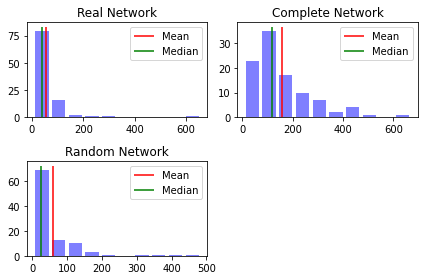

Real Network:
Mean time to discovery of C1/C2 =  56.67 rounds
Median time to discovery of C1/C2 =  38.5 rounds

Complete Network:
Mean time to discovery of C1/C2 =  158.51 rounds
Median time to discovery of C1/C2 =  117.5 rounds

Random Network:
Mean time to discovery of C1/C2 =  58.77 rounds
Median time to discovery of C1/C2 =  26.0 rounds


In [35]:
plt.subplot(2, 2, 1)
plt.hist(simduration1, facecolor='b', alpha=.5, rwidth=.8)
ymin, ymax = plt.gca().get_ylim()
plt.vlines(mean1, colors = 'r', ymin = ymin, ymax = ymax, label = 'Mean')
plt.vlines(median1, colors = 'g', ymin = ymin, ymax = ymax, label = 'Median')
plt.gca().legend()
plt.title('Real Network')

plt.subplot(2, 2, 2)
plt.hist(simduration2, facecolor='b', alpha=.5, rwidth=.8)
ymin, ymax = plt.gca().get_ylim()
plt.vlines(mean2, colors = 'r', ymin = ymin, ymax = ymax, label = 'Mean')
plt.vlines(median2, colors = 'g', ymin = ymin, ymax = ymax, label = 'Median')
plt.gca().legend()
plt.title('Complete Network')

plt.subplot(2, 2, 3)
plt.hist(simduration3, facecolor='b', alpha=.5, rwidth=.8)
ymin, ymax = plt.gca().get_ylim()
plt.vlines(mean3, colors = 'r', ymin = ymin, ymax = ymax, label = 'Mean')
plt.vlines(median3, colors = 'g', ymin = ymin, ymax = ymax, label = 'Median')
plt.gca().legend()
plt.title('Random Network')

plt.tight_layout()
plt.show()

print("Real Network:")
print("Mean time to discovery of C1/C2 = ", mean1, "rounds")
print("Median time to discovery of C1/C2 = ", median1, "rounds")
print("")
print("Complete Network:")
print("Mean time to discovery of C1/C2 = ", mean2, "rounds")
print("Median time to discovery of C1/C2 = ", median2, "rounds")
print("")
print("Random Network:")
print("Mean time to discovery of C1/C2 = ", mean3, "rounds")
print("Median time to discovery of C1/C2 = ", median3, "rounds")

Surprisingly, the random network performed really well. After some thinking that makes sense though: the reason the fully connected network takes so long to find the superdrug ist that any slight improvement (eg discovery of first drug in group A) is immideately broadcast through the entire network, so everyone keeps focusing on that instead of discovering path B from the original ingredients. This does not happen in the random network, since it is no as connected. The random network has a similar mean time to discovery as the real one, and in fact a much lower median time (meaning it is generally faster but has some high outliers), still baffles me a bit though. Maybe a real network is already "too" well connected, because it has benefits in other social situations...